# Supuestos de Linealidad

- Linealidad: La relación entre las variables independientes y dependientes debe ser lineal.
- Independencia: Las observaciones deben ser independientes entre sí.
- Homocedasticidad: La varianza de los errores debe ser constante a lo largo de las observaciones.
- Normalidad de los errores: Los residuos deben estar distribuidos normalmente.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

Generación de datos para el ejemplo Creamos un conjunto de datos que cumpla con los supuestos de la regresión lineal. Esto servirá como base para mostrar qué sucede cuando no se cumplen.

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Variable independiente
y = 5 + 2 * X + np.random.randn(100, 1)  # Variable dependiente con ruido

Ajuste del modelo de regresión lineal

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métrica de error
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 0.6536995137170043


Supuesto de linealidad Para verificar la linealidad, podemos observar si la relación entre las variables independientes y dependientes es claramente lineal. Usaremos un gráfico de dispersión.

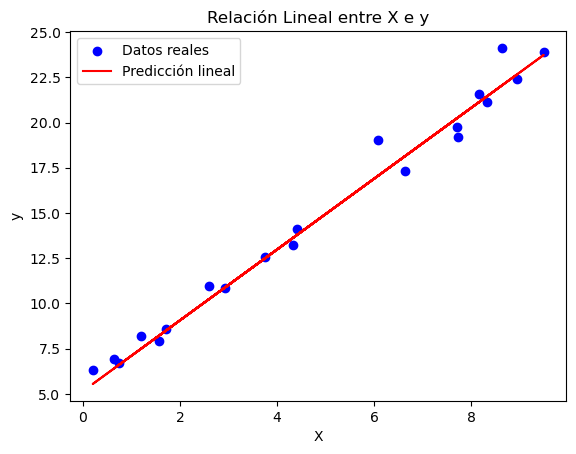

In [4]:
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicción lineal')
plt.title("Relación Lineal entre X e y")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Independencia de los errores Para ilustrar la independencia, podemos mostrar un gráfico de residuos (errores vs predicción) que, si hay independencia, no debería mostrar patrones visibles.

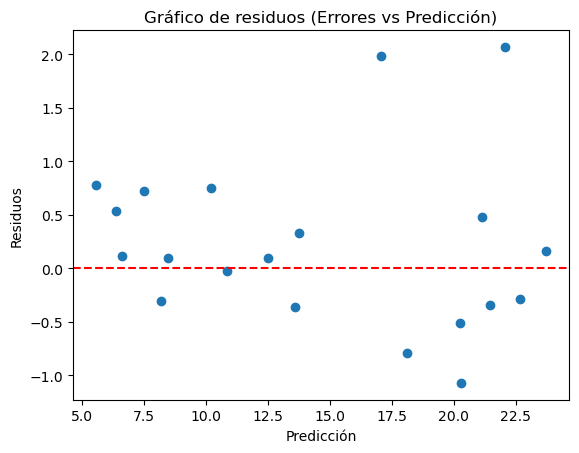

In [5]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gráfico de residuos (Errores vs Predicción)")
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.show()


Homocedasticidad Para verificar la homocedasticidad, los residuos deberían tener una varianza constante a lo largo de todas las predicciones. Nuevamente, usamos el gráfico de residuos.  Si la varianza de los residuos se amplía o se reduce a medida que cambia el valor de la predicción, este supuesto se viola.

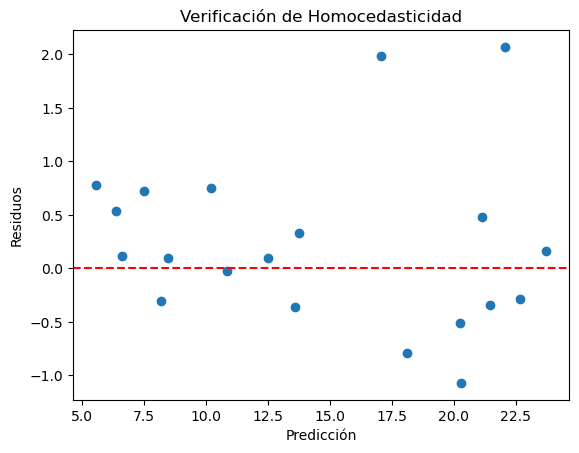

In [6]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Verificación de Homocedasticidad")
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.show()


Normalidad de los errores Para verificar la normalidad de los errores, podemos usar un histograma o un gráfico Q-Q.

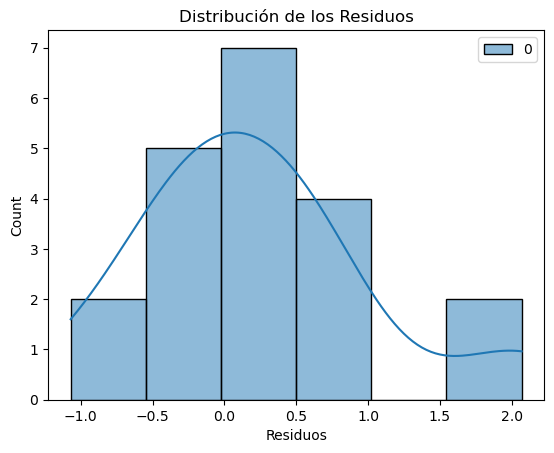

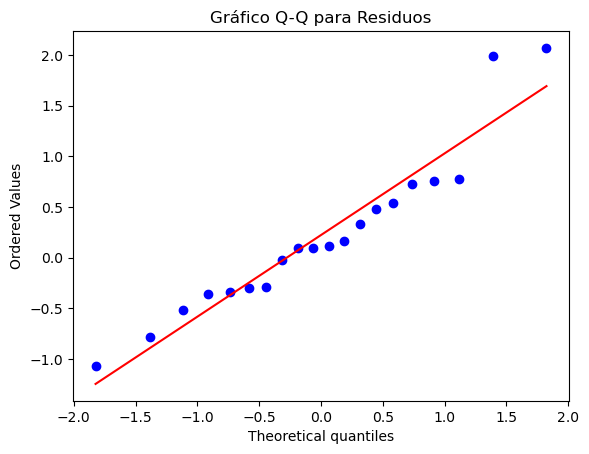

In [7]:
sns.histplot(residuals, kde=True)
plt.title("Distribución de los Residuos")
plt.xlabel("Residuos")
plt.show()

stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Residuos")
plt.show()

Si los residuos no siguen una distribución normal, los puntos en el gráfico Q-Q se desviarán de la línea recta.

# Extensión del ejemplo para violaciones de los supuestos

Para ilustrar qué sucede cuando los supuestos no se cumplen, puedes generar datasets donde, por ejemplo, la relación no sea lineal, haya heterocedasticidad, o los errores no sigan una distribución normal. Por ejemplo:

Error cuadrático medio (MSE): 194.62274957591154


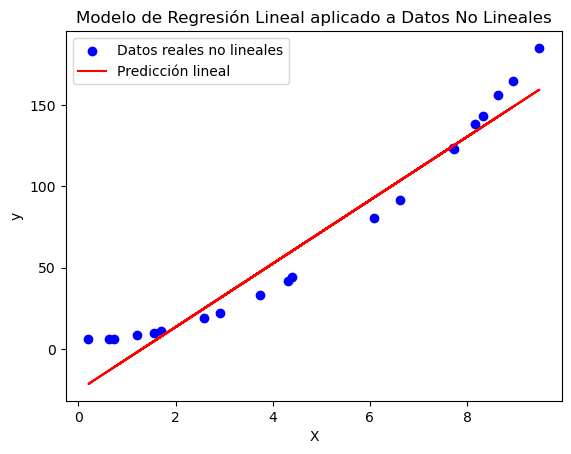

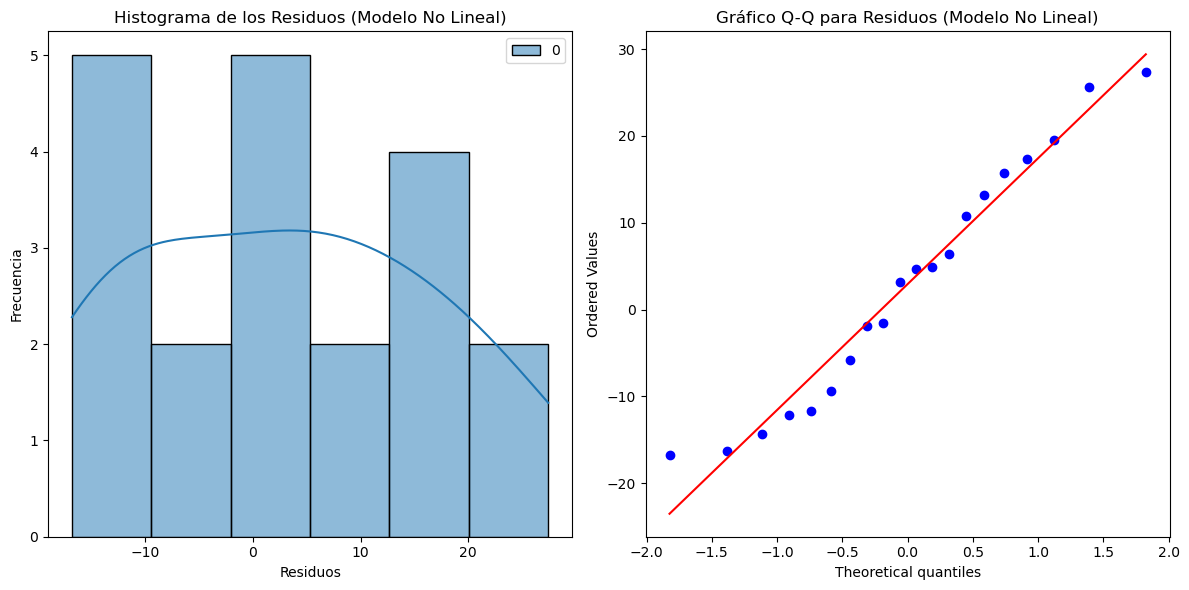

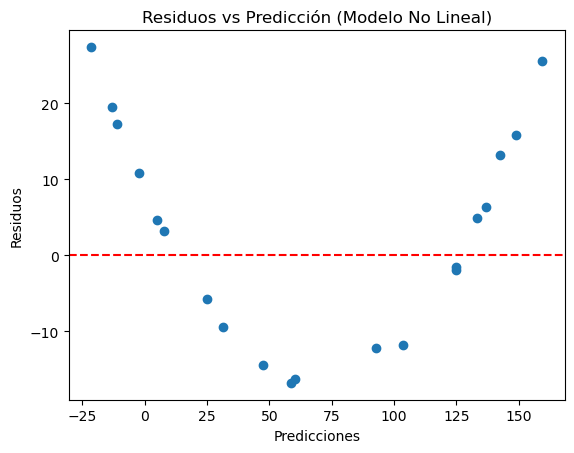

In [8]:
#No linealidad

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generación de datos no lineales
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Variable independiente
y_non_linear = 5 + 2 * X**2 + np.random.randn(100, 1)  # Relación no lineal (cuadrática) con ruido

# Ajuste del modelo de regresión lineal a datos no lineales
X_train, X_test, y_train, y_test = train_test_split(X, y_non_linear, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métrica de error
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Visualización de la relación no lineal
plt.scatter(X_test, y_test, color='blue', label='Datos reales no lineales')
plt.plot(X_test, y_pred, color='red', label='Predicción lineal')
plt.title("Modelo de Regresión Lineal aplicado a Datos No Lineales")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Verificación de los residuos

# Residuos (errores)
residuals = y_test - y_pred

# Configuración de los subplots para el histograma y gráfico Q-Q
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de los residuos
sns.histplot(residuals, kde=True, ax=ax[0], color='blue')
ax[0].set_title("Histograma de los Residuos (Modelo No Lineal)")
ax[0].set_xlabel("Residuos")
ax[0].set_ylabel("Frecuencia")

# Gráfico Q-Q
stats.probplot(residuals.flatten(), dist="norm", plot=ax[1])
ax[1].set_title("Gráfico Q-Q para Residuos (Modelo No Lineal)")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

# Gráfico de residuos vs predicciones para verificar homocedasticidad
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuos vs Predicción (Modelo No Lineal)")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()


Error cuadrático medio (MSE): 30.51795029394442


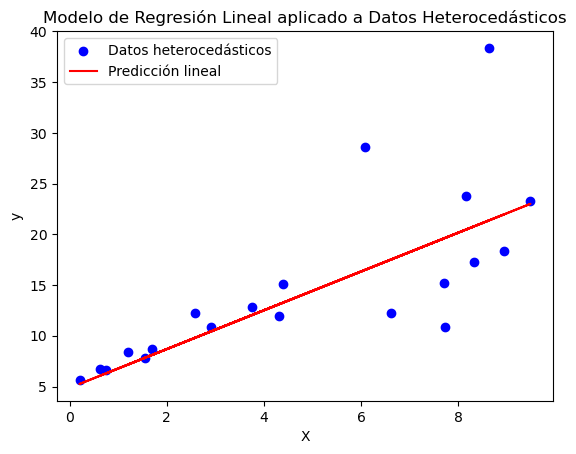

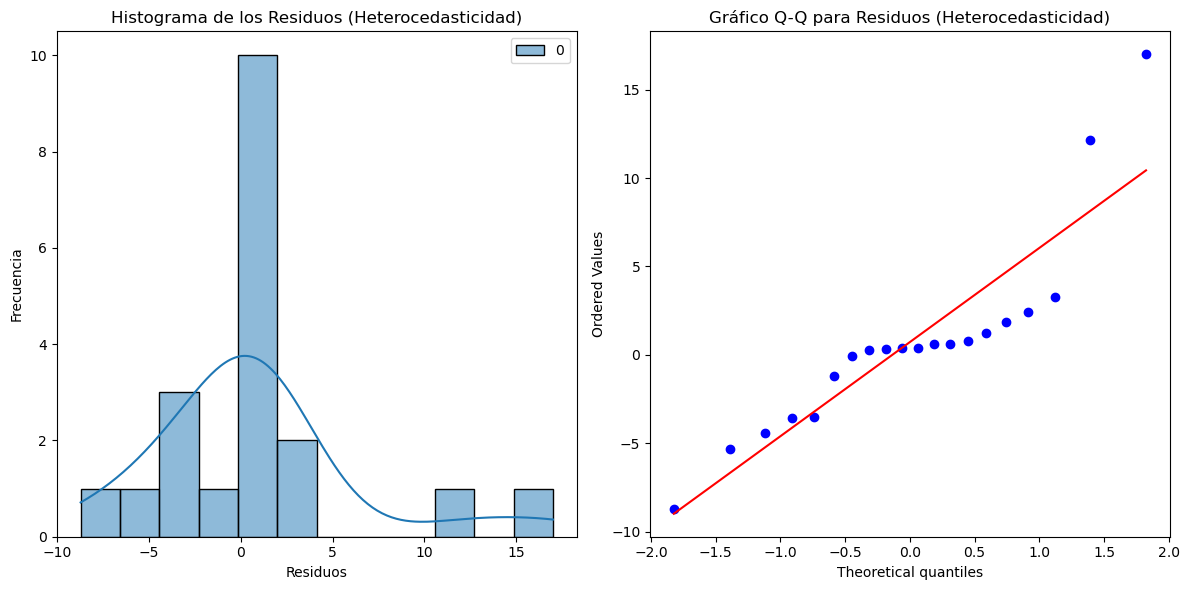

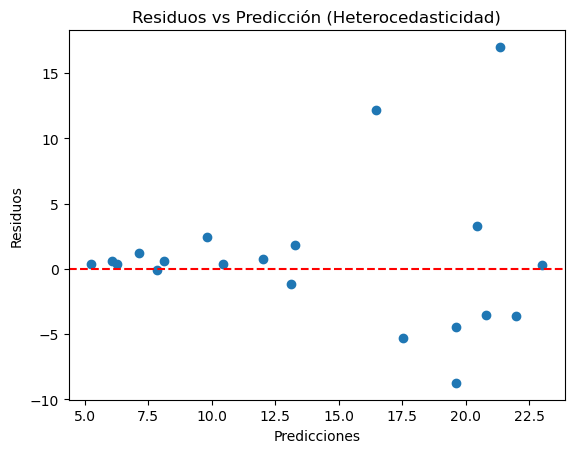

In [9]:
#Heterocedasticidad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generación de datos heterocedásticos
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Variable independiente
y_heteroscedastic = 5 + 2 * X + np.random.randn(100, 1) * X  # Heterocedasticidad: errores aumentan con X

# Ajuste del modelo de regresión lineal
X_train, X_test, y_train, y_test = train_test_split(X, y_heteroscedastic, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métrica de error
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Visualización del ajuste lineal en datos heterocedásticos
plt.scatter(X_test, y_test, color='blue', label='Datos heterocedásticos')
plt.plot(X_test, y_pred, color='red', label='Predicción lineal')
plt.title("Modelo de Regresión Lineal aplicado a Datos Heterocedásticos")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Verificación de los residuos

# Residuos (errores)
residuals = y_test - y_pred

# Configuración de los subplots para el histograma y gráfico Q-Q
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de los residuos
sns.histplot(residuals, kde=True, ax=ax[0], color='blue')
ax[0].set_title("Histograma de los Residuos (Heterocedasticidad)")
ax[0].set_xlabel("Residuos")
ax[0].set_ylabel("Frecuencia")

# Gráfico Q-Q
stats.probplot(residuals.flatten(), dist="norm", plot=ax[1])
ax[1].set_title("Gráfico Q-Q para Residuos (Heterocedasticidad)")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

# Gráfico de residuos vs predicciones para verificar homocedasticidad
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuos vs Predicción (Heterocedasticidad)")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()


# ¿Cómo identificar la heterocedasticidad con el gráfico de residuos vs predicciones?

Ejes del gráfico:
En el eje x se colocan las predicciones $𝑦_{pred}$ (valores predichos por el modelo).
En el eje y se colocan los residuos $𝑒=𝑦-y_{pred}$ (diferencia entre los valores reales y los predichos).

## Patrón esperado con homocedasticidad:
Si los residuos están distribuidos de manera homogénea y no muestran ningún patrón (es decir, están aleatoriamente dispersos alrededor de cero sin ningún tipo de tendencia creciente o decreciente), esto indica que se cumple la homocedasticidad.

## Patrón de heterocedasticidad (forma de abanico):
Si los residuos muestran una forma de abanico o embudo (es decir, su dispersión aumenta o disminuye sistemáticamente a medida que las predicciones cambian), entonces los errores no tienen varianza constante, lo que indica heterocedasticidad.